<a class="anchor" id="0.1"></a>
## Table of Contents
1. [Introduction](#1)
2. [Real-World Implementation](#2)
   - [Healthcare](#2.1)
   - [Nutrition](#2.2)
3. [Domain Applications](#3)
4. [Conclusion](#4)
5. [Set Working Directory and Load Dataset](#5)
6. [Explore Data](#6)
7. [Feature Engineering](#7)
8. [Drop Unnecessary Columns](#8)
9. [Check for Missing Values](#9)
10. [Data Scaling](#10)
11. [Split Data into Training and Testing Sets](#11)
12. [Build and Evaluate Models](#12)
    - [a. Linear Regression Model](#12.1)
    - [b. Decision Tree Regressor Model](#12.2)
    - [c. Random Forest Regressor Model](#12.3)
13. [Perform Hyperparameter Tuning using GridSearchCV](#13)
14. [Save and Load Final Model](#14)
15. [Predict Weight from Input Height](#15)

<a class="anchor" id="1"></a>
## Introduction
[Back to Table of Contents](#0.1)

The relationship between height and weight is a fundamental aspect of human biology and health. Understanding how these two variables correlate provides valuable insights into various health aspects, including growth patterns, nutritional status, and potential risks for health conditions such as obesity, malnutrition, and cardiovascular disease.

This project, BodyMetrics Analyzer, aims to analyze the relationship between height and weight using both statistical and machine learning techniques. By developing predictive models, this project seeks to estimate weight based on height, providing health professionals, nutritionists, and fitness experts with valuable tools for health assessment and personalized recommendations.

<a class="anchor" id="2"></a>
## Real-World Implementation
[Back to Table of Contents](#0.1)

In practical scenarios, understanding the height-weight relationship plays a crucial role in multiple fields:

* **Healthcare:** Physicians use height and weight to calculate Body Mass Index (BMI), an essential indicator of whether an individual is underweight, healthy, or obese. Predictive models can assist in monitoring children's growth, diagnosing health conditions, and creating personalized healthcare plans to manage weight-related health issues.

* **Nutrition:** Dietitians use height and weight data to develop personalized diet and nutritional plans. Predictive models enable more accurate caloric intake and nutrition recommendations based on an individual's height, contributing to better health outcomes.

* **Fitness & Wellness:** Fitness trainers and professionals rely on height and weight data to create tailored fitness programs. Predictive tools enhance these programs by providing precise assessments of an individual’s fitness level and health needs, leading to better-targeted exercise regimens and progress tracking.

<a class="anchor" id="3"></a>
## Domain Applications
[Back to Table of Contents](#0.1)

The analysis of height and weight has wide-ranging applications across different domains:

* **Public Health:** Monitoring trends such as obesity and undernutrition on a population level allows for the development of effective public health interventions aimed at addressing these challenges.

* **Sports Science:** Height and weight data play a key role in tailoring nutrition and training programs for athletes, helping to optimize their performance and maintain their health throughout their careers.

* **Pediatrics:** Predictive models can be used to monitor children's growth, ensuring they are developing normally and alerting parents and doctors to potential health issues early on.

<a class="anchor" id="4"></a>
## Conclusion
[Back to Table of Contents](#0.1)

The BodyMetrics Analyzer project will develop accurate predictive models by analyzing the relationship between height and weight. These models can be applied across multiple domains such as healthcare, nutrition, public health, and fitness. By utilizing advanced data science tools and machine learning libraries, this project will provide valuable insights and practical solutions to enhance health assessments, optimize training programs, and improve individualized care.

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

<a class="anchor" id="5"></a>
## Set Working Directory and Load Dataset
[Back to Table of Contents](#0.1)

In [2]:
import os 
os.getcwd()

'C:\\Users\\91939'

In [3]:
os.chdir(r'C:\Users\91939\Desktop\AI&DS\Data science projects\BodyMetricsAnalyzer')

In [4]:
df=pd.read_csv('SOCR-HeightWeight.csv')

<a class="anchor" id="6"></a>
## Explore Data
[Back to Table of Contents](#0.1)

In [5]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [6]:
print(df.shape)
print(df.columns)

(25000, 3)
Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')


<a class="anchor" id="7"></a>
## Feature Engineering
[Back to Table of Contents](#0.1)

In [7]:
df['Height(Feet.Inches)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) / 10
df['Weight_kg'] = df['Weight(Pounds)']*0.453592  

<a class="anchor" id="8"></a>
## Drop Unnecessary Columns
[Back to Table of Contents](#0.1)

In [8]:
drop_col = ['Index','Height(Inches)','Weight(Pounds)']
df = df.drop(columns=drop_col,axis=1)

In [9]:
print(df.shape)
print(df.columns)

(25000, 2)
Index(['Height(Feet.Inches)', 'Weight_kg'], dtype='object')


<a class="anchor" id="9"></a>
## Check for Missing Values
[Back to Table of Contents](#0.1)

In [10]:
df.isna().any() 

Height(Feet.Inches)    False
Weight_kg              False
dtype: bool

In [11]:
df.corr()

,Height(Feet.Inches),Weight_kg
Height(Feet.Inches),1.000000,0.499192
Weight_kg,0.499192,1.000000


In [12]:
df.describe()

,Height(Feet.Inches),Weight_kg
count,25000.000000,25000.000000
mean,5.795967,57.642209
std,0.183513,5.289290
min,5.027836,35.386871
25%,5.670440,54.117461
50%,5.799570,57.677738
75%,5.927296,61.186318
max,6.315280,77.529759


<Axes: xlabel='Height(Feet.Inches)'>

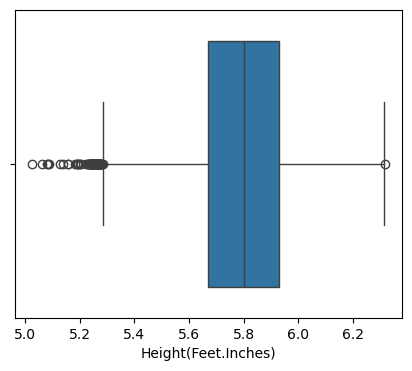

In [13]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df['Height(Feet.Inches)'])

<Axes: xlabel='Weight_kg'>

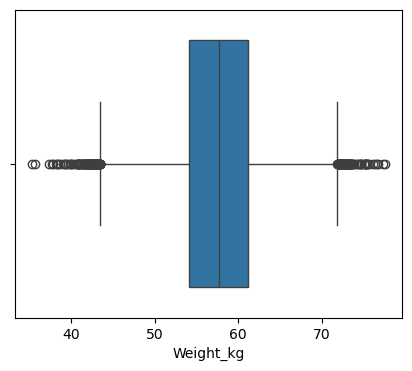

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df['Weight_kg'])

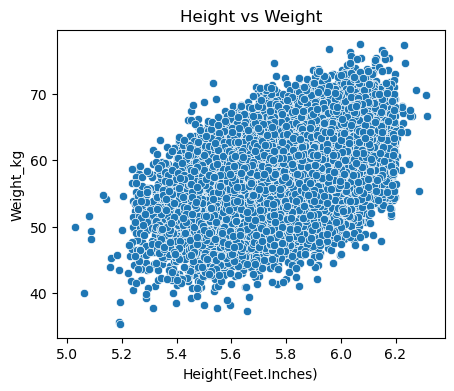

In [15]:
x=df['Height(Feet.Inches)']
y=df['Weight_kg']
plt.figure(figsize=(5,4))
sns.scatterplot(x=x,y=y)
plt.title('Height vs Weight')
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight_kg')
plt.show()

In [16]:
X=df.iloc[:,0]
y=df.iloc[:,1]

In [17]:
X.head()

0    5.578331
1    6.151521
2    5.939874
3    5.821660
4    5.778781
Name: Height(Feet.Inches), dtype: float64

In [18]:
y.head()

0    51.252494
1    61.909547
2    69.411778
3    64.562199
4    65.452010
Name: Weight_kg, dtype: float64

<a class="anchor" id="10"></a>
## Data Scaling
[Back to Table of Contents](#0.1)

In [19]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X.values.reshape(-1,1))

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

<a class="anchor" id="11"></a>
## Split Data into Training and Testing Sets
[Back to Table of Contents](#0.1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)

print('Shpae of testing data: ')
print(X_test.shape)
print(y_test.shape)

Shape of training data: 
(20000,)
(20000,)
Shpae of testing data: 
(5000,)
(5000,)


In [22]:
#linear regression model X should be 2d array so we are reshaping it to 2d array

# Reshape training data
X_train_2d = X_train.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)

# Reshape testing data
X_test_2d = X_test.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

print("Shape of training data (X):", X_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", X_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

Shape of training data (X): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (X): (5000, 1)
Shape of testing data (y): (5000, 1)


<a class="anchor" id="12"></a>
## Build and Evaluate Models
[Back to Table of Contents](#0.1)

<a class="anchor" id="12.1"></a>
### a. Linear Regression Model

In [23]:
model_lr = LinearRegression() #linear Regression
model_lr

LinearRegression()

In [24]:
model_lr.fit(X_train_2d,y_train_2d)

LinearRegression()

In [26]:
y_pred_lr = model_lr.predict(X_test_2d)
y_pred_lr[:10]

array([[55.94425481],
       [60.91226889],
       [56.56867714],
       [56.42643564],
       [51.52547113],
       [52.93798976],
       [60.30463034],
       [60.27256006],
       [62.74472434],
       [63.0616341 ]])

In [27]:
y_test_2d[:10]

array([[60.87349789],
       [64.25661383],
       [50.63170805],
       [53.62895327],
       [46.5397639 ],
       [48.20970821],
       [55.81821505],
       [55.03481631],
       [76.60307055],
       [55.98708736]])

In [28]:
mean_squared_error(y_pred_lr,y_test_2d)

21.69730652290755

<a class="anchor" id="12.2"></a>
### b. Decision Tree Regressor Model

In [29]:
model_dtr = DecisionTreeRegressor()
model_dtr

DecisionTreeRegressor()

In [30]:
model_dtr.fit(X_train_2d, y_train_2d)

DecisionTreeRegressor()

In [31]:
y_pred_dtr = model_dtr.predict(X_test_2d)
y_pred_dtr[:10]

array([63.37542065, 56.46639802, 56.7162365 , 64.71347169, 57.84078178,
       55.64920668, 63.98391432, 61.98048917, 61.30032797, 67.3051603 ])

In [32]:
y_test_2d[:10]

array([[60.87349789],
       [64.25661383],
       [50.63170805],
       [53.62895327],
       [46.5397639 ],
       [48.20970821],
       [55.81821505],
       [55.03481631],
       [76.60307055],
       [55.98708736]])

In [33]:
mean_squared_error(y_pred_dtr,y_test_2d)

41.50751860513505

<a class="anchor" id="12.3"></a>
### c. Random Forest Regressor Model

In [34]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train_2d,y_train_2d) 

C:\Users\91939\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [35]:
y_pred_rfr = model_rfr.predict(X_test_2d)
y_pred_rfr[:10]

array([59.16732519, 57.27680862, 56.99085833, 61.73315861, 55.64877259,
       54.59264349, 61.40914741, 60.47707073, 60.49045533, 66.56396875])

In [36]:
mean_squared_error(y_pred_rfr,y_test_2d)

31.107996108864878

<a class="anchor" id="13"></a>
## Perform Hyperparameter Tuning using GridSearchCV
[Back to Table of Contents](#0.1)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a Linear Regression model
model_lr = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_2d, y_train_2d)

# Print the best parameters and best MSE score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)


Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Negative MSE Score: -20.836260216566203


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, X_train_2d, y_train_2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)

MSE Scores: [21.65411512 21.79844701 20.33072238 21.2128048  21.84713487 20.47547042
 20.38317103 20.4544885  21.45193422 18.76081422]


In [39]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model with the best parameters
final_model = LinearRegression(fit_intercept=False, copy_X=True)

# Fit the model to the entire training data
final_model.fit(X_train_2d, y_train_2d)

# Now you can use final_model to make predictions on new data


LinearRegression(fit_intercept=False)

<a class="anchor" id="14"></a>
## Save and Load Final Model
[Back to Table of Contents](#0.1)

In [40]:
import pickle

# Define the filename for the pickle file
filename = 'final_model.pkl'

# Save the final_model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

In [41]:
os.path.abspath('final_model.pkl')

'C:\\Users\\91939\\Desktop\\AI&DS\\Data science projects\\BodyMetricsAnalyzer\\final_model.pkl'

<a class="anchor" id="15"></a>
## Predict Weight from Input Height
[Back to Table of Contents](#0.1)

In [42]:
import pickle
import numpy as np

# Load the saved model from the file
filename = 'final_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Input height for prediction
height_input = 6.0

# Reshape the input height to match the shape expected by the model (2D array)
height_input_2d = np.array(height_input).reshape(1, -1)

# Use the loaded model to make predictions
predicted_weight = loaded_model.predict(height_input_2d)

# Print the predicted weight
print("Predicted weight:", predicted_weight[0, 0])


Predicted weight: 59.72023785370345
